### import standard libaries

In [14]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#load the data
mnist = fetch_openml('mnist_784',cache=True)

In [5]:
#sort the data by target
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [6]:
#convert the target variable to 'int' since it's string formated
mnist.target = mnist.target.astype(np.int64)

In [7]:
#extract data and target 
X,y = mnist['data'],mnist['target']
X.shape,y.shape

((70000, 784), (70000,))

In [32]:
#create a functon to plot the images
def plot_image(img,n):
    digit_img = img[n]
    digit_final_img = digit_img.reshape(28,28)
    plt.imshow(digit_final_img,cmap=matplotlib.cm.binary,
               interpolation='nearest')
    
    plt.axis('off')
    plt.show()

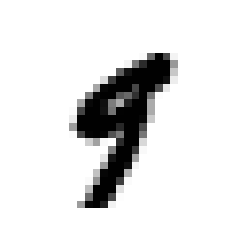

In [10]:
plot_image(X,36000)

In [11]:
#split the data into train-test
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [12]:
#shuffle the data based on index
np.random.seed(42)
shuffle_index = np.random.permutation(60000)
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]

### train the knn after adding noise to a data

In [13]:
noise_train = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train+noise_train

noise_test = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test+noise_test

y_train_mod = X_train
y_test_mod = X_test

In [15]:
knn = KNeighborsClassifier()
knn.fit(X_train_mod,y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

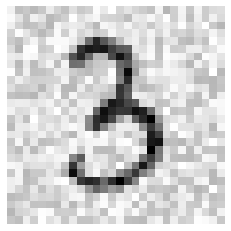

In [33]:
plot_image(X_train_mod,1000)

In [34]:
pred = knn.predict([X_test_mod[3000]])

In [35]:
def plot_image(img):
    digit_img = img
    digit_final_img = digit_img.reshape(28,28)
    plt.imshow(digit_final_img,cmap=matplotlib.cm.binary,
               interpolation='nearest')
    
    plt.axis('off')
    plt.show()

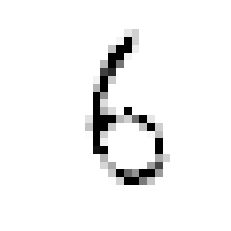

In [36]:
plot_image(pred)